In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('default of credit card clients.xls')
pd.set_option('display.max_columns', 500)

# Libraries imported. Time to explore and clean!

In [2]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0


In [39]:
df.SEX.value_counts()

2.0    18112
1.0    11888
Name: SEX, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
ID                            30000 non-null float64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null float64
EDUCATION                     30000 non-null float64
MARRIAGE                      30000 non-null float64
AGE                           30000 non-null float64
PAY_0                         30000 non-null float64
PAY_2                         30000 non-null float64
PAY_3                         30000 non-null float64
PAY_4                         30000 non-null float64
PAY_5                         30000 non-null float64
PAY_6                         30000 non-null float64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-nul

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.shape

(30001, 25)

In [6]:
df.isna().sum()

ID                            1
LIMIT_BAL                     1
SEX                           1
EDUCATION                     1
MARRIAGE                      1
AGE                           1
PAY_0                         1
PAY_2                         1
PAY_3                         1
PAY_4                         1
PAY_5                         1
PAY_6                         1
BILL_AMT1                     1
BILL_AMT2                     1
BILL_AMT3                     1
BILL_AMT4                     1
BILL_AMT5                     1
BILL_AMT6                     1
PAY_AMT1                      1
PAY_AMT2                      1
PAY_AMT3                      1
PAY_AMT4                      1
PAY_AMT5                      1
PAY_AMT6                      1
default payment next month    1
dtype: int64

In [11]:
df.dtypes

ID                            float64
LIMIT_BAL                     float64
SEX                           float64
EDUCATION                     float64
MARRIAGE                      float64
AGE                           float64
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default payment next month    float64
dtype: object

In [12]:
df['SEX'].value_counts(normalize=True)

2.0    0.603733
1.0    0.396267
Name: SEX, dtype: float64

In [21]:
df.head(30)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,6.0,50000.0,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,7.0,500000.0,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,8.0,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,9.0,140000.0,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,0.0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
10,10.0,20000.0,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [4]:
df.isnull().sum()

ID                            1
LIMIT_BAL                     1
SEX                           1
EDUCATION                     1
MARRIAGE                      1
AGE                           1
PAY_0                         1
PAY_2                         1
PAY_3                         1
PAY_4                         1
PAY_5                         1
PAY_6                         1
BILL_AMT1                     1
BILL_AMT2                     1
BILL_AMT3                     1
BILL_AMT4                     1
BILL_AMT5                     1
BILL_AMT6                     1
PAY_AMT1                      1
PAY_AMT2                      1
PAY_AMT3                      1
PAY_AMT4                      1
PAY_AMT5                      1
PAY_AMT6                      1
default payment next month    1
dtype: int64

In [5]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
ID                            30000 non-null float64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null float64
EDUCATION                     30000 non-null float64
MARRIAGE                      30000 non-null float64
AGE                           30000 non-null float64
PAY_0                         30000 non-null float64
PAY_2                         30000 non-null float64
PAY_3                         30000 non-null float64
PAY_4                         30000 non-null float64
PAY_5                         30000 non-null float64
PAY_6                         30000 non-null float64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-nul

In [10]:
df.isnull().values.any()

False

## No more null values in sight. Let's check the shape and dig a bit deeper to see what else we can do.

### Let's examine the distribution between those likely to pay next month v. those likely to default.

Text(0, 0.5, 'Frequency')

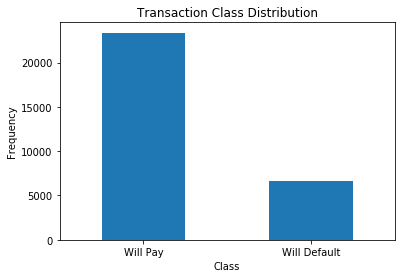

In [18]:
LABELS = ["Will Pay", "Will Default"]

count_classes = pd.value_counts(df['default payment next month'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [19]:
will_pay = df[df['default payment next month']==0]

will_default = df[df['default payment next month']==1]

In [21]:
print(will_pay.shape,will_default.shape)

(23364, 25) (6636, 25)


## How different are the credit limits among those who will pay vs. will default?

In [23]:
will_pay.LIMIT_BAL.describe()

count      23364.000000
mean      178099.726074
std       131628.359660
min        10000.000000
25%        70000.000000
50%       150000.000000
75%       250000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [24]:
will_default.LIMIT_BAL.describe()

count      6636.000000
mean     130109.656420
std      115378.540571
min       10000.000000
25%       50000.000000
50%       90000.000000
75%      200000.000000
max      740000.000000
Name: LIMIT_BAL, dtype: float64

## The credit limit analysis for those likely to default vs. pay is as follows:
- 25% higher maximum among those who will pay (1M vs. 740K)
- The 3rd Quartile is 20% higher among those who will pay (250K v. 200K)
- 60% higher Median among those who will pay (150K v. 90K)
- 40% higher 1st Quartile among those who will pay (70K v. 50K)
- Minimum Credit Limit is the SAME. 10K. 
     - We can assume this is the starting credit limit for everyone. 

In [28]:
# Do Credit Defaults Happen more often with a certain education level?

<Figure size 432x864 with 0 Axes>

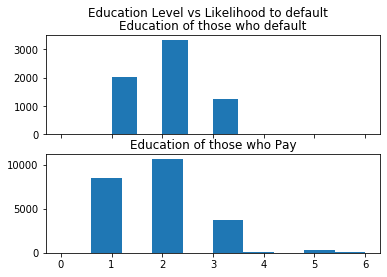

In [36]:
plt.figure(figsize=(6,12))
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Education Level vs Likelihood to default')
ax1.hist(will_default.EDUCATION)
ax1.set_title('Education of those who default')
ax2.hist(will_pay.EDUCATION)
ax2.set_title('Education of those who Pay')
plt.show()

In [31]:
# The majority have undergraduate degrees, second most frequent is grad school, followed by high school.

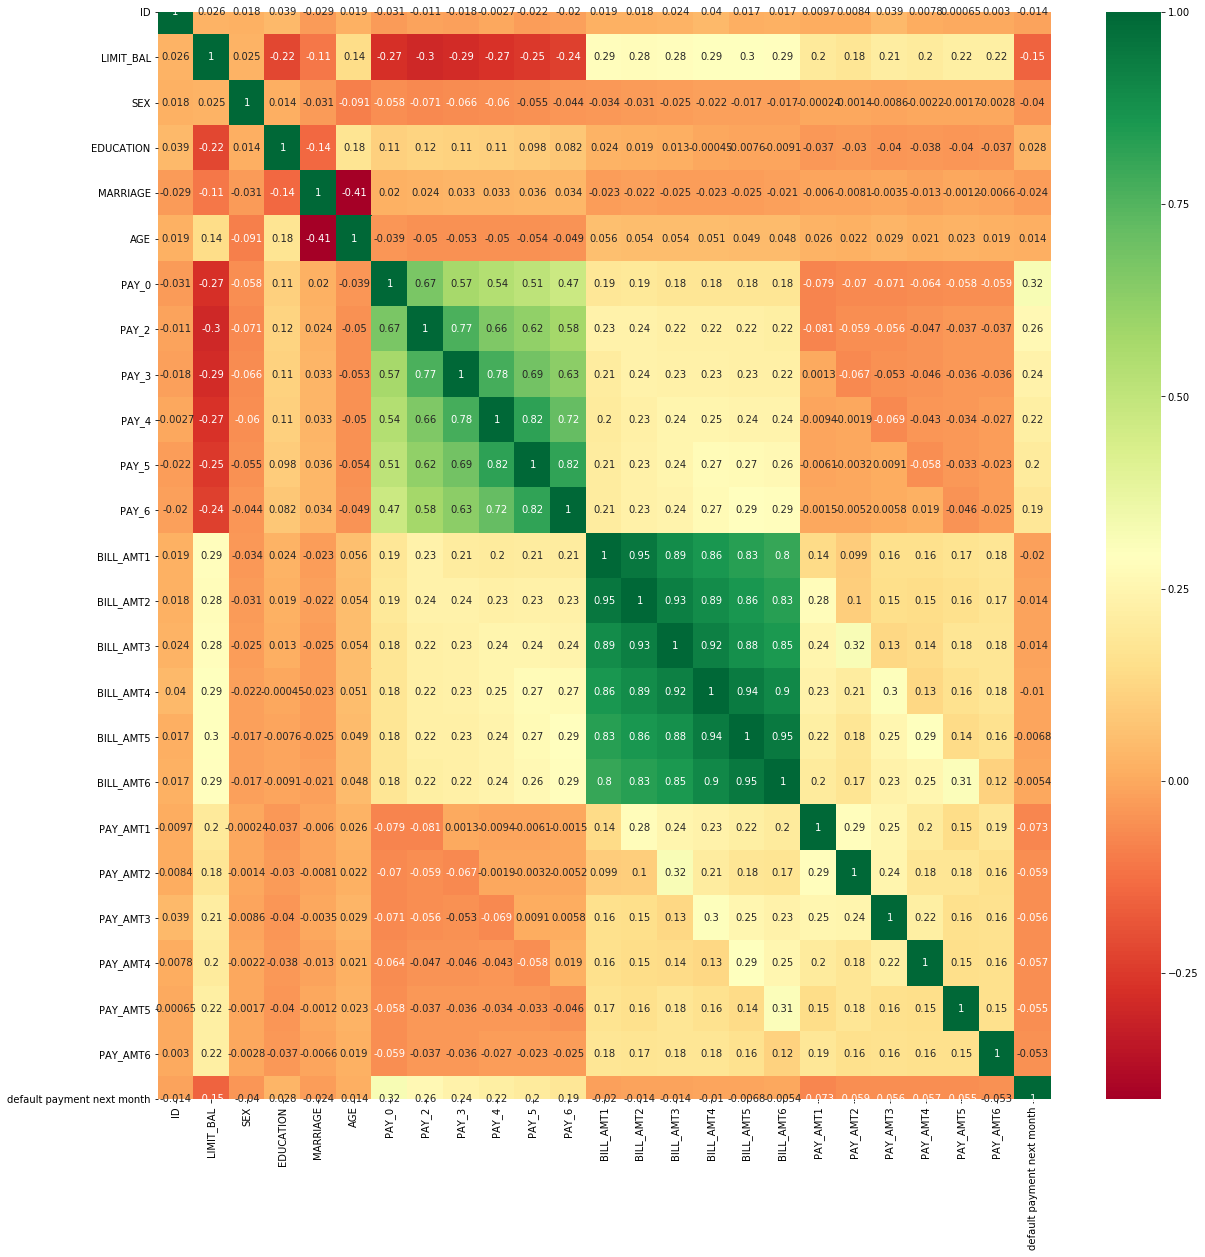

In [48]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [49]:
df_org = df.copy()

In [50]:
df_org.rename(columns={'LIMIT_BAL': 'credit_limit', 'SEX':'sex', 
                       'EDUCATION': 'education', 'MARRIAGE' : 'marriage','AGE': 'age', 
                       'PAY_0':'sep_status', 'PAY_2' : 'aug_status',
                       'PAY_3' : 'july_status', 'PAY_4' : 'june_status',
                       'PAY_5' : 'may_status', 'PAY_6': 'april_status',
                       'BILL_AMT1': 'balance_sep', 'BILL_AMT2': 'balance_aug',
                       'BILL_AMT3': 'balance_july', 'BILL_AMT4': 'balance_june',
                       'BILL_AMT5': 'balance_may', 'BILL_AMT6' :'balance_april',
                       'PAY_AMT1': 'amt_paid_sep', 'PAY_AMT2': 'amt_paid_aug', 
                       'PAY_AMT3': 'amt_paid_july', 'PAY_AMT4': 'amt_paid_june',
                       'PAY_AMT5': 'amt_paid_may', 'PAY_AMT6': 'amt_paid_april'},
              inplace=True)
df_org.head()

,ID,credit_limit,sex,education,marriage,age,sep_status,aug_status,july_status,june_status,may_status,april_status,balance_sep,balance_aug,balance_july,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,default payment next month
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [54]:
df_org.head(20)

,ID,credit_limit,sex,education,marriage,age,sep_status,aug_status,july_status,june_status,may_status,april_status,balance_sep,balance_aug,balance_july,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,default payment next month
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,6.0,50000.0,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,7.0,500000.0,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,8.0,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,9.0,140000.0,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,0.0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
10,10.0,20000.0,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


## Notes on Source of Dataframe:
- UCI
    - Taiwan Bank in 2005
- The Columns:
    - credit_limit = Highest value each individual can spend on their credit
    - sex: 
        - 1 = Male
        - 2 = Female
    - education:
        - 1 = Graduate Degree
        - 2 = Undergraduate Degree
        - 3 = High School
        - 0,4,5,6 = Other
    - Marriage
        - 1 = Married
        - 2 = Single
        - 3 = Divorced
        - 0,4 = Other
    - Age
       - Self-Explanatory
    - month_status 
      - Status of payment
          - -2: No Consumption
          - -1: Paid in Full
          - 0: Uses revolving credit
          - 1: Payment delay for one month
          - Each additional number = payment delay for x month(s)--> 9 is highest
    - balance_month
      - Balance in each month mentioned. September - April
    - amt_paid_month
      - Amount of **previous** payment
    - default payment next month
      - 0 = not default (will pay)
      - 1 = will default

# Stakeholders? Prediction of important features?

## Stakeholders:
- Banks that are interested in safely giving out credit to customers.

## Feature Importance?
- I predict that credit limit, education, and month_status will be of most importance but we will see.

## Are false positives or false negatives more of a concern?
- False positives could potentially lead to major losses for the bank while false negatives will lead to some annoyed customers. 

In [62]:
df_org.to_csv('clean.csv')